In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import script.utility as ut

In [2]:
simulation_data = pd.read_csv('data/simulation_data.csv')
simulation_data = simulation_data.set_index(simulation_data['Price_Ticker'])
simulation_data.index = pd.to_datetime(simulation_data.index)
simulation_data.head()

,Price_Ticker,Close_AAPL,Close_AMZN,Close_BA,Close_CAT,Close_CVX,Close_GOOGL,Close_GS,Close_JNJ,Close_JPM,...,Volume_MCD,Volume_MSFT,Volume_NKE,Volume_NVDA,Volume_PFE,Volume_SOFI,Volume_TSLA,Volume_UNH,Volume_WMT,Volume_XOM
Price_Ticker,,,,,,,,,,,,,,,,,,,,,
2024-03-01,2024-03-01,179.012268,178.220001,200.000000,331.704254,148.097229,136.644638,381.606262,158.338089,181.148910,...,3028600.0,17800300.0,7347600.0,479135000.0,46213600.0,26200600.0,82099200.0,7312200.0,19017700.0,18459500.0
2024-03-04,2024-03-04,174.468719,177.580002,200.539993,333.625275,144.288452,132.868347,385.686829,156.111267,182.507858,...,2832000.0,17596000.0,11050900.0,615616000.0,86777700.0,35426400.0,134334900.0,5239800.0,16033300.0,18138000.0
2024-03-05,2024-03-05,169.506653,174.119995,201.139999,328.581268,144.976547,132.190796,384.369232,156.238251,184.336060,...,2969600.0,26919200.0,8670600.0,520639000.0,73646100.0,187827900.0,119660800.0,5296200.0,19676900.0,19952700.0
2024-03-06,2024-03-06,168.510254,173.509995,201.000000,330.650147,143.755402,130.925369,383.051666,155.622940,185.294174,...,2348000.0,22344100.0,10045300.0,582520000.0,84919500.0,131025300.0,107920900.0,5577500.0,12698700.0,20472800.0
2024-03-07,2024-03-07,168.390686,176.820007,203.029999,335.171997,144.763321,133.894623,381.930725,155.163895,183.671265,...,2237700.0,18718500.0,8133900.0,608119000.0,46423800.0,83118900.0,102129000.0,5102000.0,16195300.0,15195400.0


Benchmark

Simple long throughout the whole period for different stocks with different weights using all the money at inital


In [3]:
tickers = [col.split('_')[1] for col in simulation_data.columns if col.startswith('Close_')]
tickers

['AAPL',
 'AMZN',
 'BA',
 'CAT',
 'CVX',
 'GOOGL',
 'GS',
 'JNJ',
 'JPM',
 'KO',
 'MCD',
 'MSFT',
 'NKE',
 'NVDA',
 'PFE',
 'SOFI',
 'TSLA',
 'UNH',
 'WMT',
 'XOM']

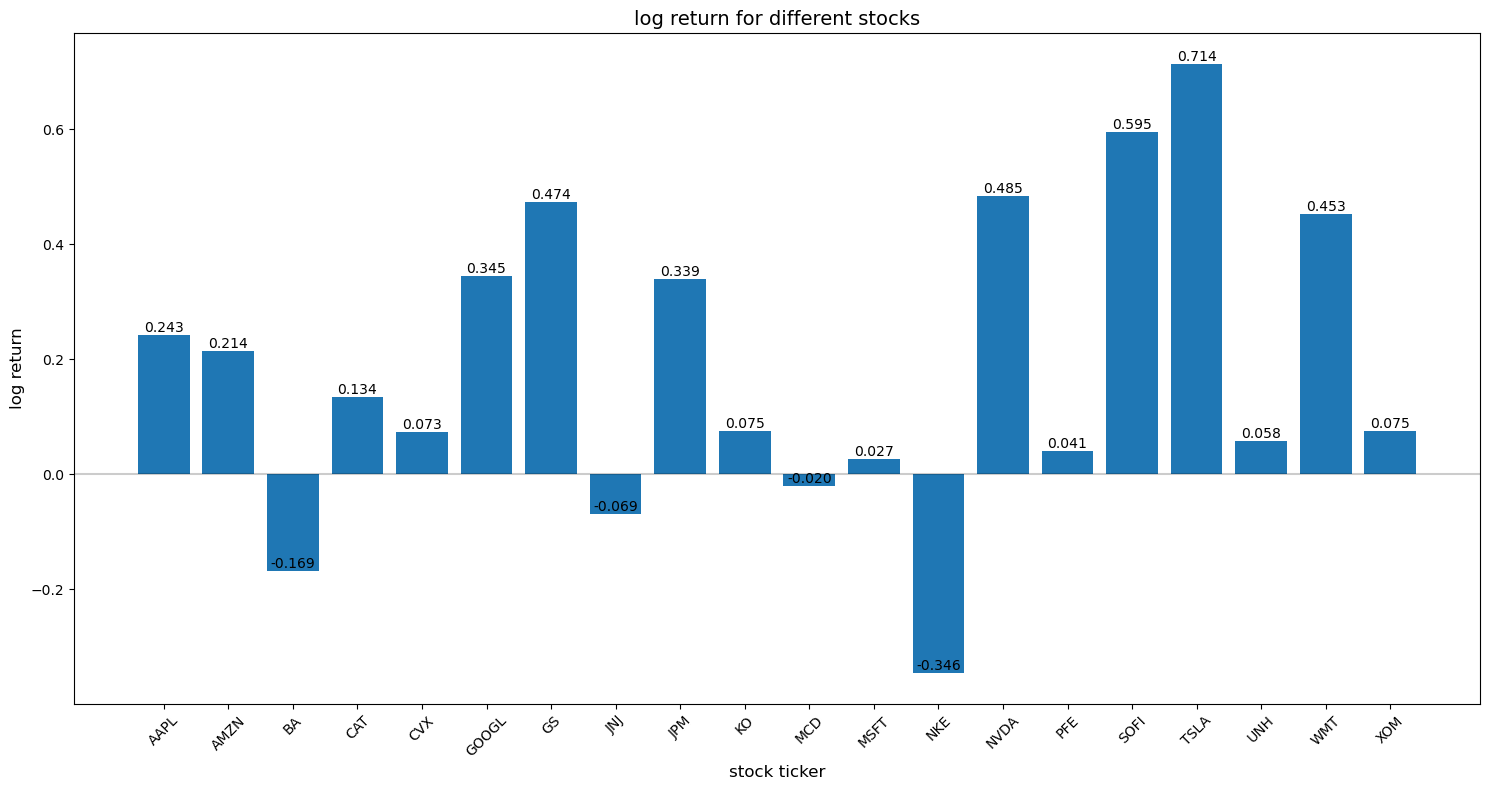

In [4]:
"""
Simple long throughout the whole period for different stocks
"""

log_returns = []
for ticker in tickers:
    total_log_return = ut.calculate_log_returns(simulation_data, ticker).sum()
    log_returns.append(total_log_return)

plt.figure(figsize=(15, 8))
bars = plt.bar(tickers, log_returns)

plt.title('log return for different stocks', fontsize=14)
plt.xlabel('stock ticker', fontsize=12)
plt.ylabel('log return', fontsize=12)

plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}',
            ha='center', va='bottom')

plt.axhline(y=0, color='black', linestyle='-', alpha=0.2)

plt.tight_layout()

102107.1872594963


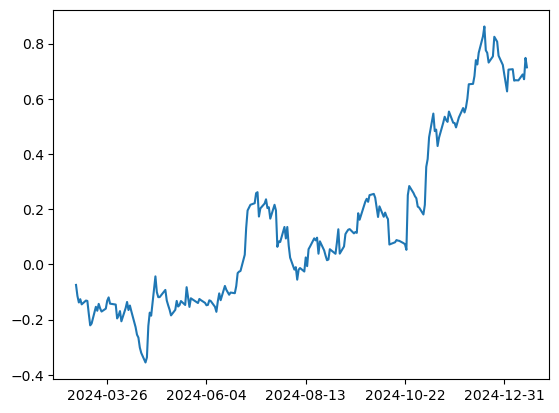

In [23]:
"""
So the baseline should be just buy the TSLA and long for the whole period
"""

ticker = 'TSLA'
initial_capital = 50000
plt.plot(ut.calculate_log_returns(simulation_data, ticker).cumsum())
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 


final_capital = initial_capital * np.exp(ut.calculate_log_returns(simulation_data, ticker).sum())
print(final_capital)

In [6]:
returns_dict = {}
for ticker in tickers:
    total_log_return = ut.calculate_log_returns(simulation_data, ticker).sum()
    returns_dict[ticker] = total_log_return

top_10 = dict(sorted(returns_dict.items(), key=lambda x: x[1], reverse=True)[:10])

for ticker, ret in top_10.items():
    print(f"{ticker}: {ret:.4f}")

top_10_tickers = list(top_10.keys())

TSLA: 0.7140
SOFI: 0.5951
NVDA: 0.4848
GS: 0.4740
WMT: 0.4526
GOOGL: 0.3448
JPM: 0.3391
AAPL: 0.2430
AMZN: 0.2136
CAT: 0.1337


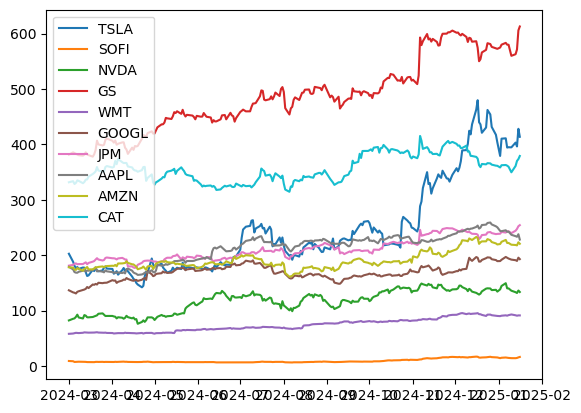

In [33]:
plt.plot(simulation_data['Close_TSLA'])
plt.plot(simulation_data['Close_SOFI'])
plt.plot(simulation_data['Close_NVDA'])
plt.plot(simulation_data['Close_GS'])
plt.plot(simulation_data['Close_WMT'])
plt.plot(simulation_data['Close_GOOGL'])
plt.plot(simulation_data['Close_JPM'])
plt.plot(simulation_data['Close_AAPL'])
plt.plot(simulation_data['Close_AMZN'])
plt.plot(simulation_data['Close_CAT'])
plt.legend(['TSLA', 'SOFI', 'NVDA', 'GS', 'WMT', 'GOOGL', 'JPM', 'AAPL', 'AMZN', 'CAT'])